# **Kaggle Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 25.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.utils import plot_model


import visualkeras
from PIL import ImageFont
#font = ImageFont.truetype("arial.ttf", 12)

import warnings
warnings.filterwarnings('ignore')

# DATA PROCESSING

In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

print('X_train Shape: {}'.format(X_train.shape))
print('X_test Shape: {}'.format(X_test.shape))
print('Y_train Shape: {}'.format(Y_train.shape))
print('Y_test Shape: {}'.format(Y_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
X_train Shape: (50000, 32, 32, 3)
X_test Shape: (10000, 32, 32, 3)
Y_train Shape: (50000, 1)
Y_test Shape: (10000, 1)


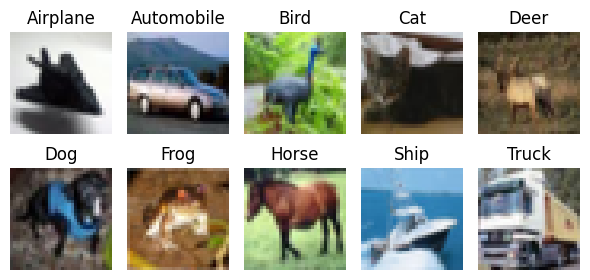

In [9]:
import matplotlib.pyplot as plt
import numpy as np

class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Create a dictionary to store one image per class
class_images = {}

for i, (image, label) in enumerate(zip(X_train, Y_train.flatten())):
    if label not in class_images:  # If we don't have an image for this class yet
        class_images[label] = image
    if len(class_images) == len(class_names):  # If we have all classes, stop searching
        break

# Plot the images
plt.figure(figsize=(6, 3))
for class_id, image in class_images.items():
    plt.subplot(2, 5, class_id + 1)  # Create a 2x5 grid of subplots
    plt.imshow(image)
    plt.title(class_names[class_id])
    plt.axis("off")  # Turn off axes

plt.tight_layout()
plt.show()

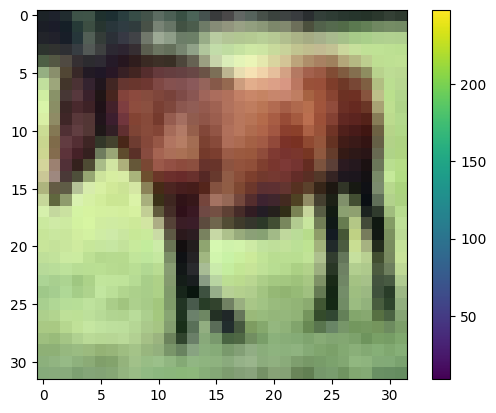

In [ ]:
plt.figure()
plt.imshow(X_train[7])
plt.colorbar()

# PRE-PROCESSING

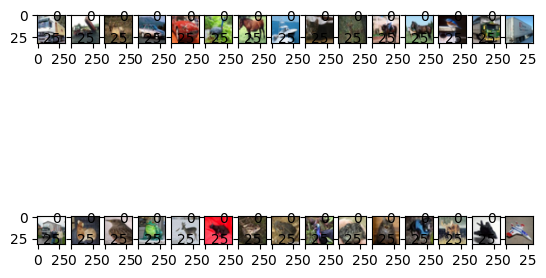

In [4]:
# Normalizing
X_train = X_train/255
X_test = X_test/255

# One-Hot-Encoding
Y_train_en = to_categorical(Y_train,10)
Y_test_en = to_categorical(Y_test,10)

# Visualizing the data
for i in range(1,31):
  plt.subplot(2, 15, i)
  plt.imshow(X_train[i])

# TRAINING

## INITIAL MODEL

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,802 (475.79 KB)

 Trainable params: 121,802 (475.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3678 - loss: 1.7194 - val_accuracy: 0.5484 - val_loss: 1.2773
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5711 - loss: 1.2145 - val_accuracy: 0.5668 - val_loss: 1.2069
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6277 - loss: 1.0647 - val_accuracy: 0.6363 - val_loss: 1.0449
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6683 - loss: 0.9507 - val_accuracy: 0.6499 - val_loss: 1.0128
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6946 - loss: 0.8796 - val_accuracy: 0.6575 - val_loss: 0.9977
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7143 - loss: 0.8135 - val_accuracy: 0.6625 - val_loss: 0.9781
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7331 - loss: 0.7622 - val_accuracy: 0.6667 - val_loss: 0.9788
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7537 - loss: 0.7111 -

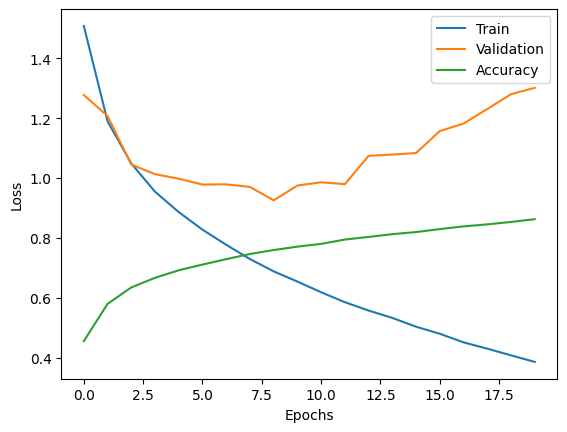

In [ ]:
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dense(10, activation ='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

model.summary()
history = model.fit(X_train, Y_train_en, epochs = 20, verbose=1,validation_data=(X_test,Y_test_en))

def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()

plotloss(history)

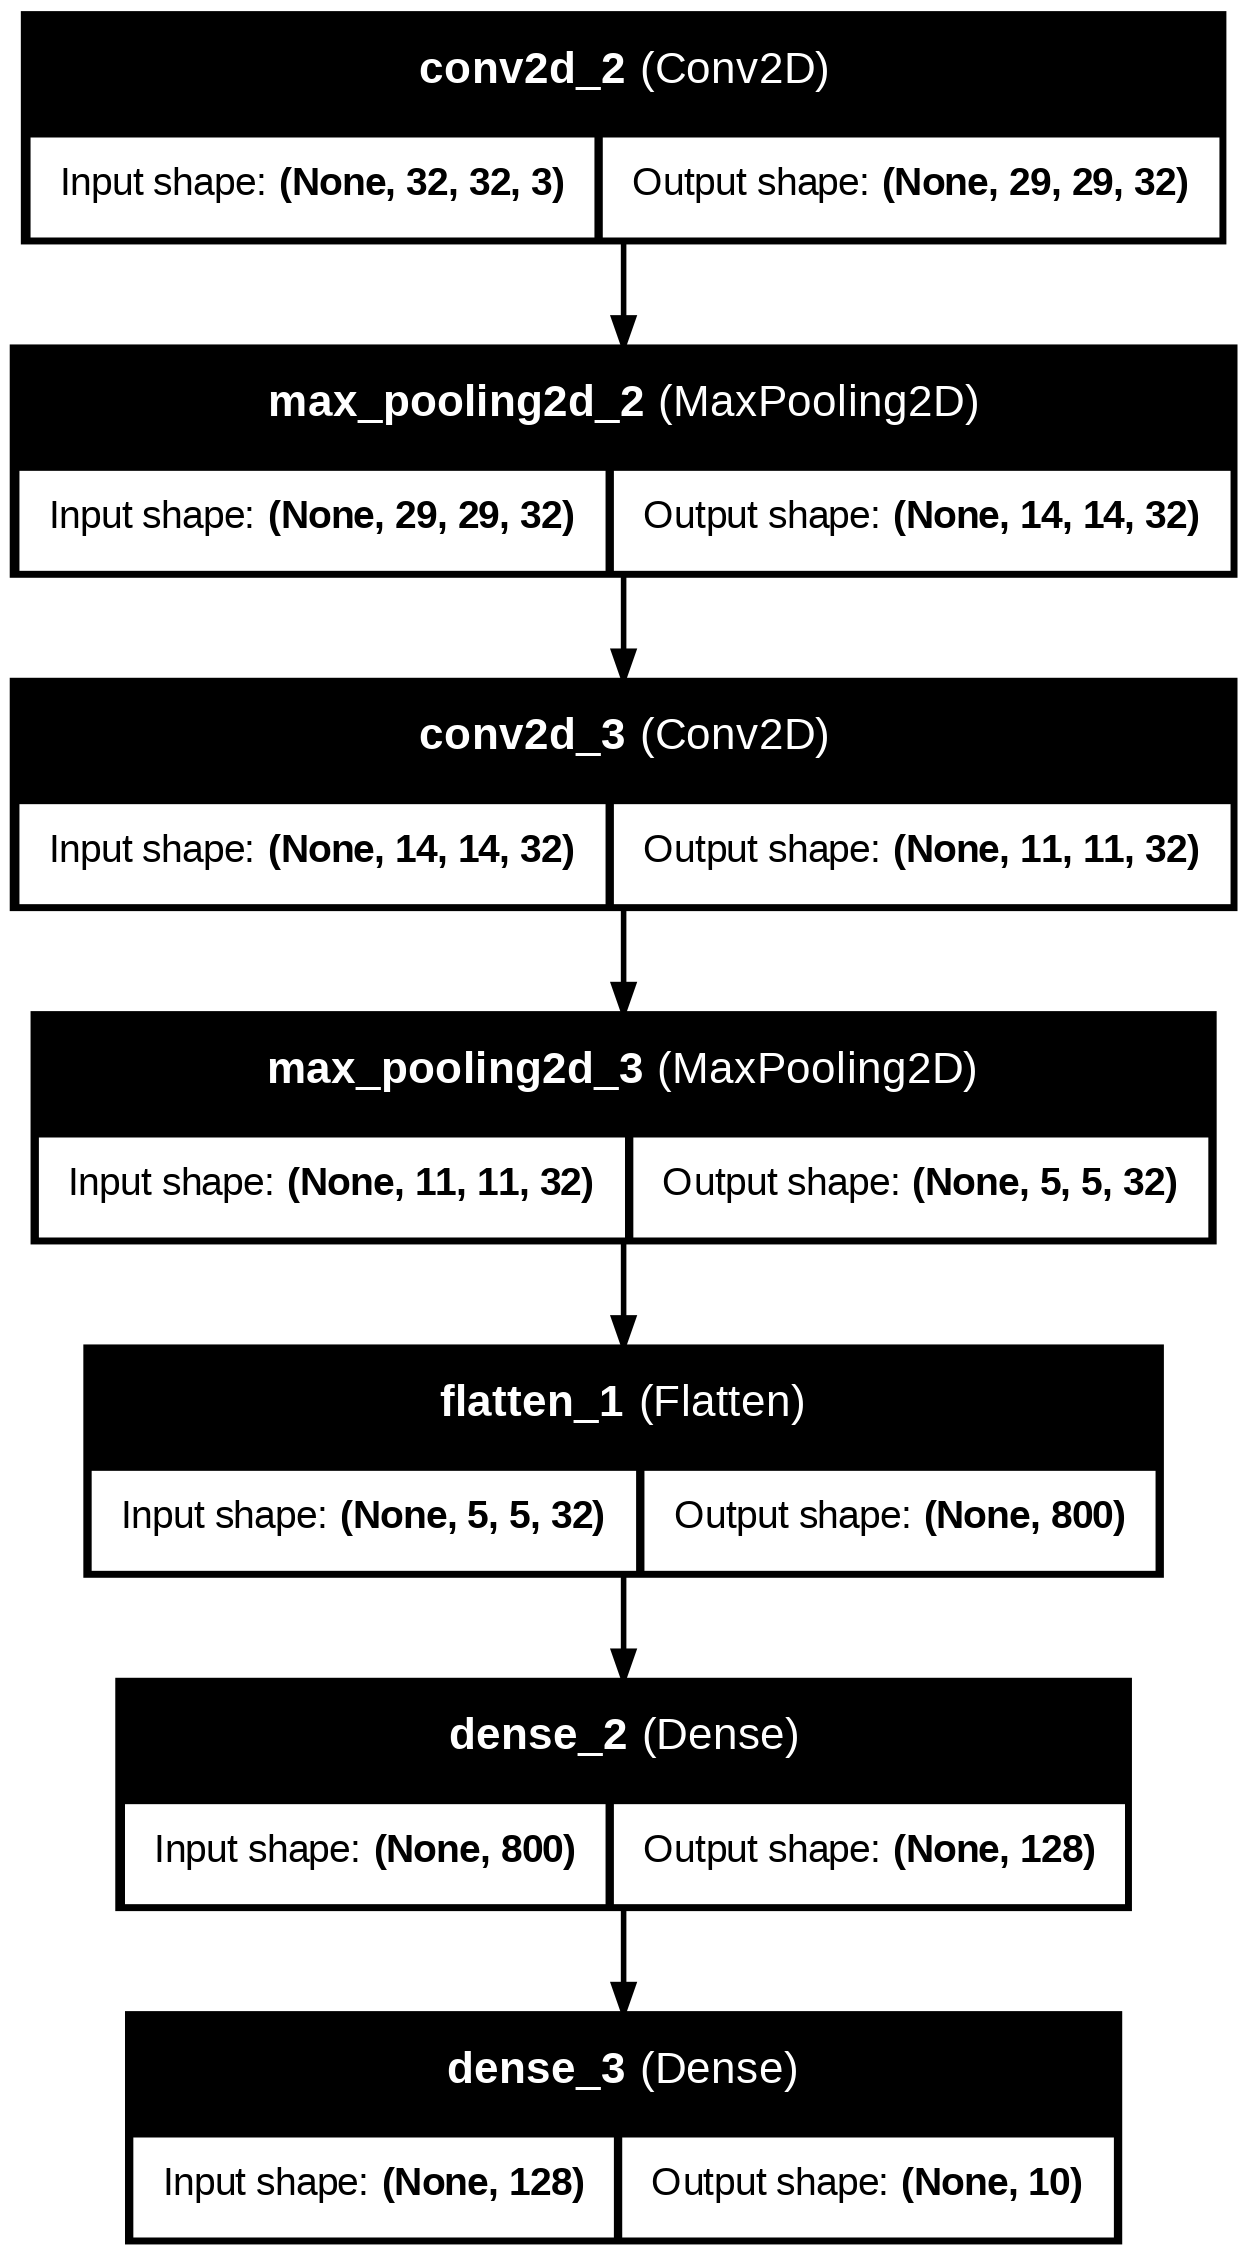

In [ ]:
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
evaluation = model.evaluate(X_test, Y_test_en)
print('Test Accuracy of Base Model: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6756 - loss: 1.2750
Test Accuracy of Base Model: 0.6728000044822693


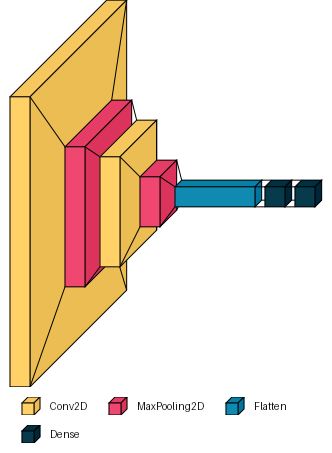

In [ ]:
visualkeras.layered_view(model, scale_xy=10, legend=True)

## FINAL MODEL

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,517,450 (5.79 MB)

 Trainable params: 1,515,658 (5.78 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 20ms/step - accuracy: 0.3536 - loss: 2.0205 - val_accuracy: 0.5607 - val_loss: 1.2608
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6572 - loss: 0.9858 - val_accuracy: 0.6993 - val_loss: 0.8725
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.7344 - loss: 0.7645 - val_accuracy: 0.7534 - val_loss: 0.7297
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7846 - loss: 0.6322 - val_accuracy: 0.7577 - val_loss: 0.7005
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.8178 - loss: 0.5408 - val_accuracy: 0.8015 - val_loss: 0.5986
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8462 - loss: 0.4560 - val_accuracy: 0.8025 - val_loss: 0.5838
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8620 - loss: 0.4067 - val_accuracy: 0.8283 - val_loss: 0.5336
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8790 -

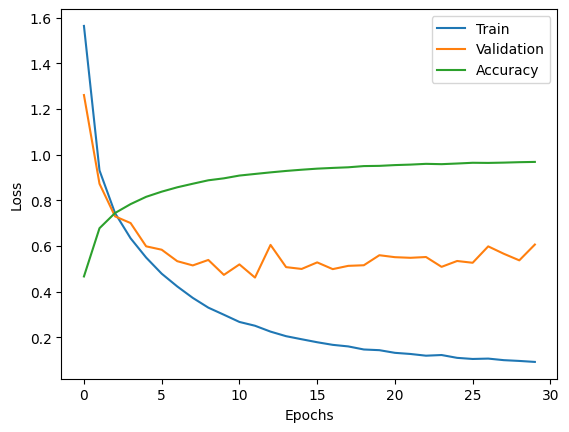

In [5]:
model_3 = Sequential()
model_3.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.2))
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.35))
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))
model_3.add(Dense(10, activation='softmax'))
model_3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model_3.summary()
history_3 = model_3.fit(X_train, Y_train_en, epochs = 30, verbose = 1, validation_data = (X_test, Y_test_en))

def plotloss(history_3):
    plt.plot(history_3.history['loss'])
    plt.plot(history_3.history['val_loss'])
    plt.plot(history_3.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()
plotloss(history_3)

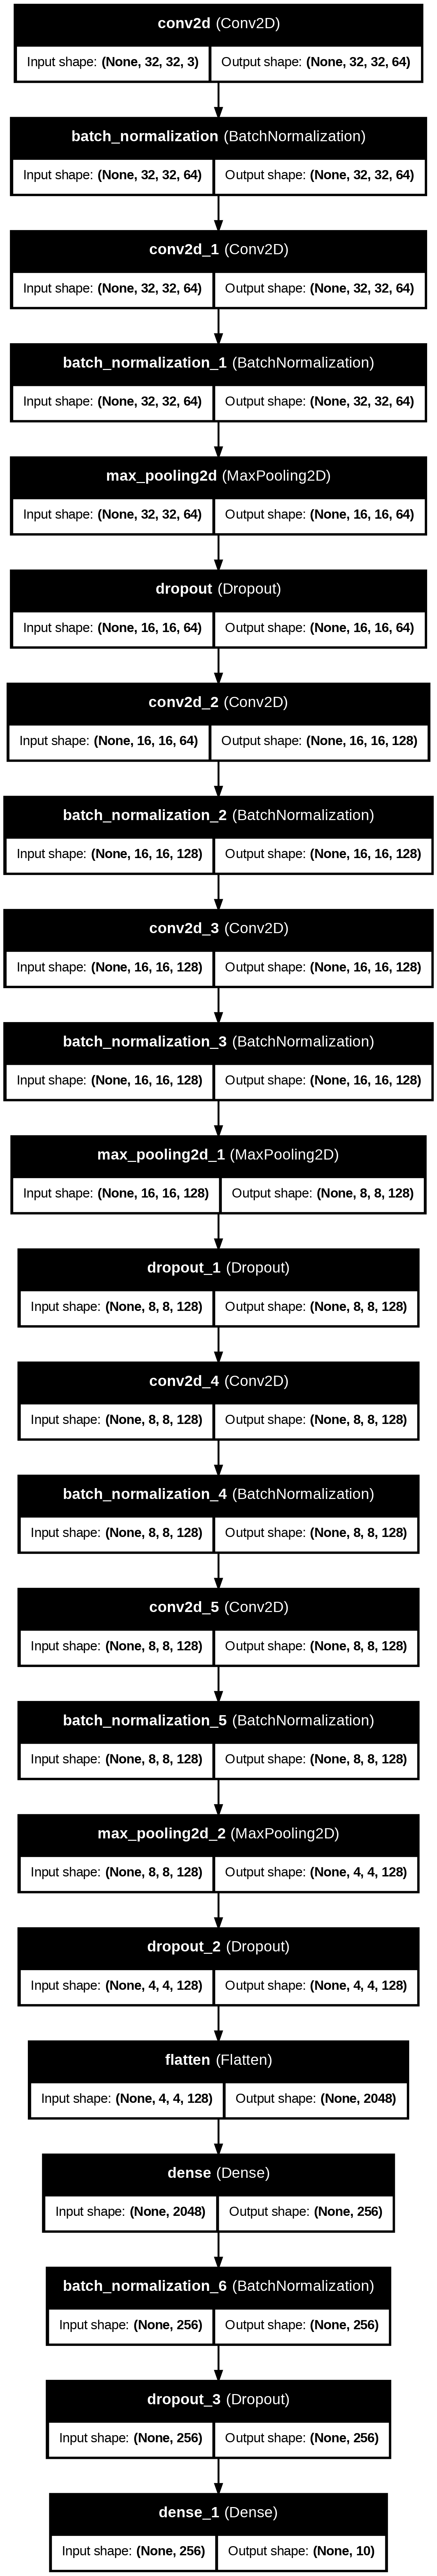

In [ ]:
plot_model(model_3, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

## MODEL VISUALIZATION

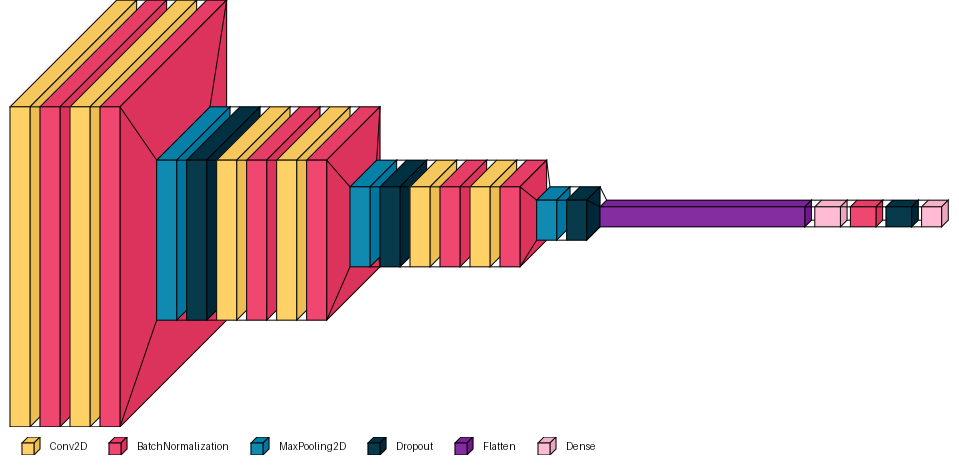

In [ ]:
visualkeras.layered_view(model_3, scale_xy=10, legend=True)

In [6]:
evaluation = model_3.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model_3 (with Batch Normalization): {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8659 - loss: 0.5769
Test Accuracy of Model_3 (with Batch Normalization): 0.8605999946594238


## CONFUSION MATRIX

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8659 - loss: 0.5769
Test Accuracy of Model_3: 0.8606
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


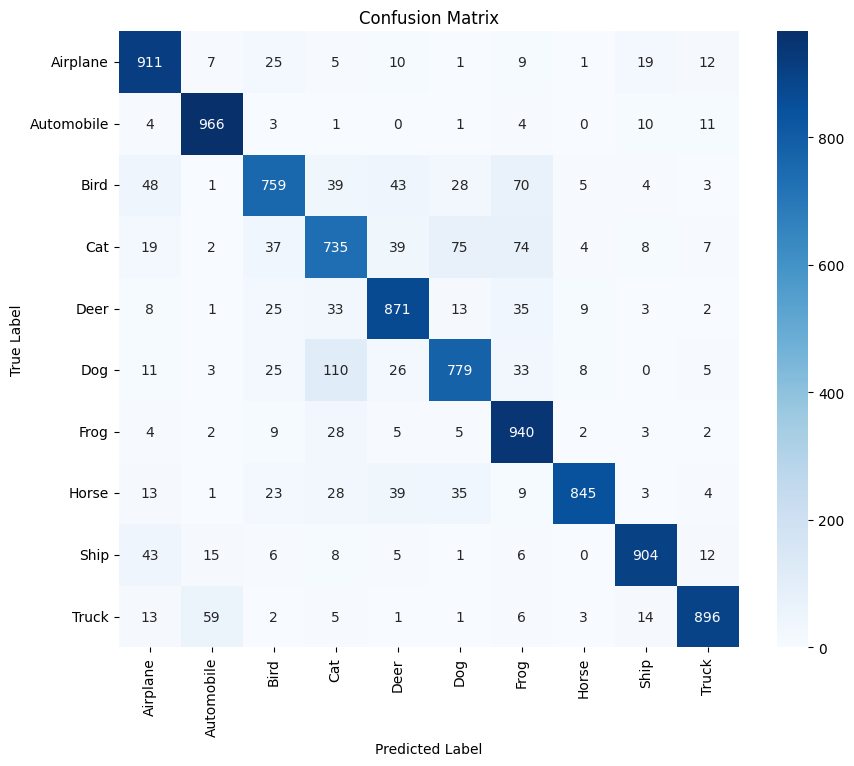

              precision    recall  f1-score   support

    Airplane       0.85      0.91      0.88      1000
  Automobile       0.91      0.97      0.94      1000
        Bird       0.83      0.76      0.79      1000
         Cat       0.74      0.73      0.74      1000
        Deer       0.84      0.87      0.85      1000
         Dog       0.83      0.78      0.80      1000
        Frog       0.79      0.94      0.86      1000
       Horse       0.96      0.84      0.90      1000
        Ship       0.93      0.90      0.92      1000
       Truck       0.94      0.90      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the test set
evaluation = model_3.evaluate(X_test, Y_test_en)
print(f"Test Accuracy of Model_3: {evaluation[1]:.4f}")

# Predict class probabilities and get the class predictions
Y_pred = model_3.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Get predicted class labels
Y_true = np.argmax(Y_test_en, axis=1)  # Get true class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report for detailed metrics
print(classification_report(Y_true, Y_pred_classes, target_names=class_names))

## GRAPH

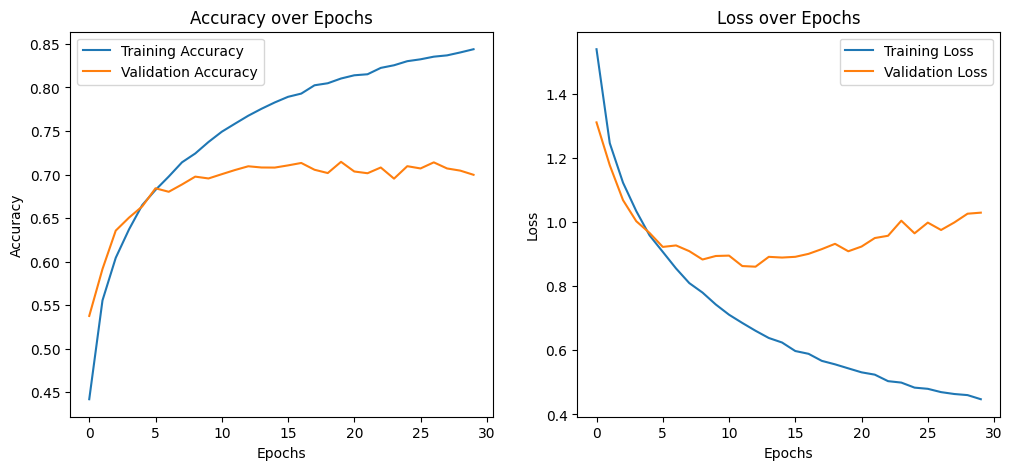

In [ ]:
plt.figure(figsize=(12, 5))
# Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## MISSCLASSIFIED IMAGES

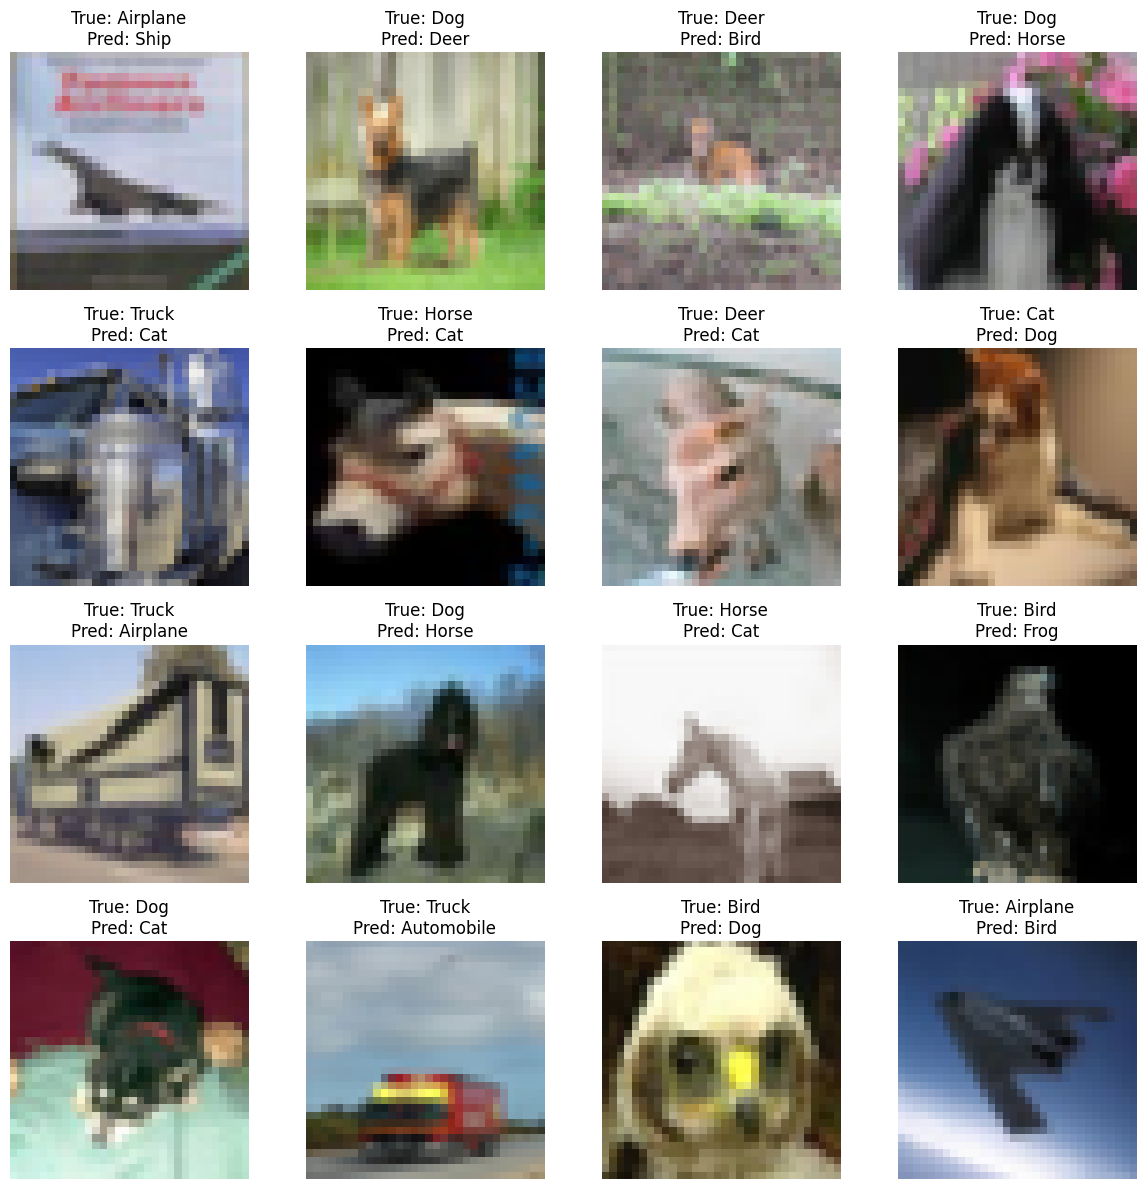

In [ ]:
misclassified_indices = np.where(Y_true != Y_pred_classes)[0]

plt.figure(figsize=(12, 12))
for i, idx in enumerate(misclassified_indices[:16]):  # Display first 16 misclassified images
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {class_names[Y_true[idx]]}\nPred: {class_names[Y_pred_classes[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

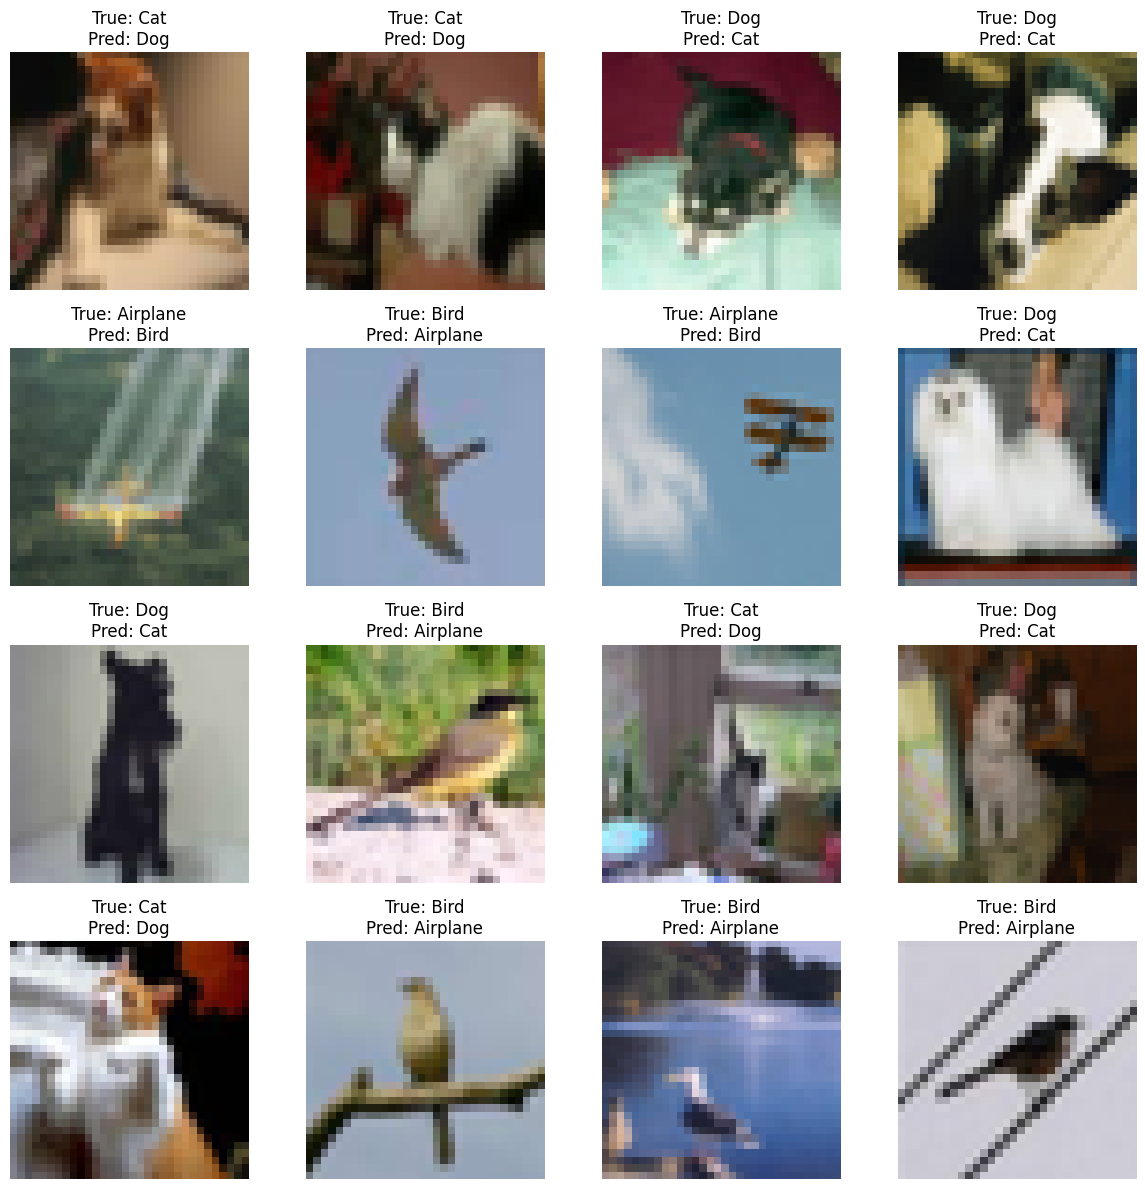

In [13]:
misclassified_indices = np.where(Y_true != Y_pred_classes)[0]

# Specify the class indices for the pairs of interest
class_pairs = [(2, 0),  # Bird vs. Airplane
               (5, 3)]  # Dog vs. Cat

# Extract misclassified indices for the specified class pairs
misclassified_indices_filtered = []
for idx in misclassified_indices:
    true_label = Y_true[idx]
    pred_label = Y_pred_classes[idx]
    if (true_label, pred_label) in class_pairs or (pred_label, true_label) in class_pairs:
        misclassified_indices_filtered.append(idx)

# Plot the filtered misclassified images
plt.figure(figsize=(12, 12))
for i, idx in enumerate(misclassified_indices_filtered[:16]):  # Display first 16 relevant misclassified images
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {class_names[Y_true[idx]]}\nPred: {class_names[Y_pred_classes[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## CLASS WISE MISSCLASSIFIED COUNT

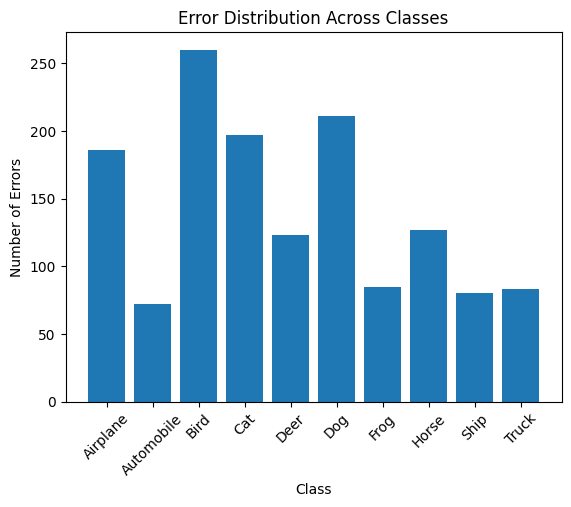

In [ ]:
error_distribution = np.bincount(Y_true[Y_true != Y_pred_classes])
plt.bar(range(10), error_distribution)
plt.xticks(range(10), class_names, rotation=45)
plt.title('Error Distribution Across Classes')
plt.xlabel('Class')
plt.ylabel('Number of Errors')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


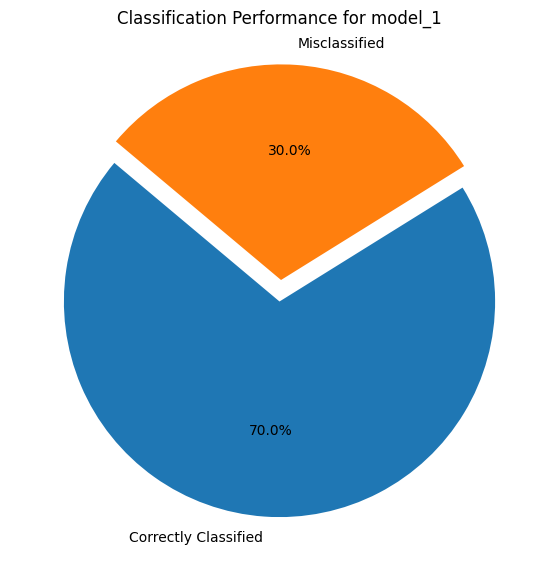

Model: model_1
Total Samples: 10000
Correctly Classified: 6997 (69.97%)
Misclassified: 3003 (30.03%)



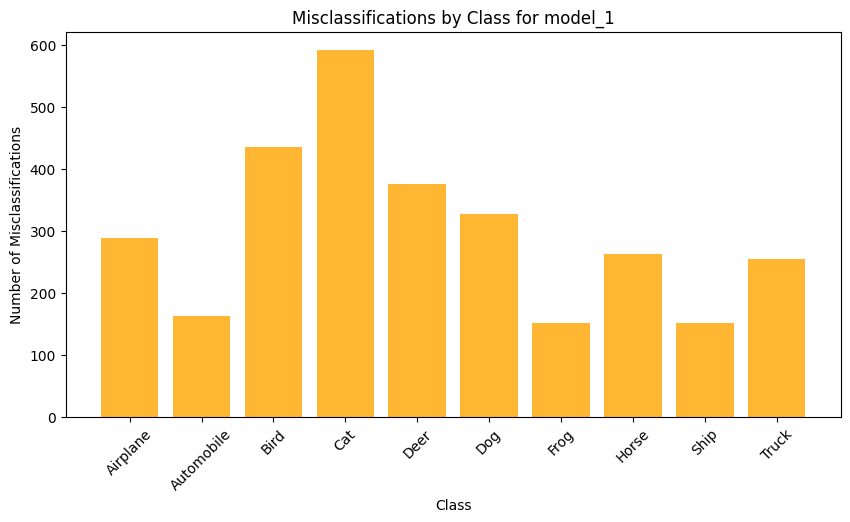

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


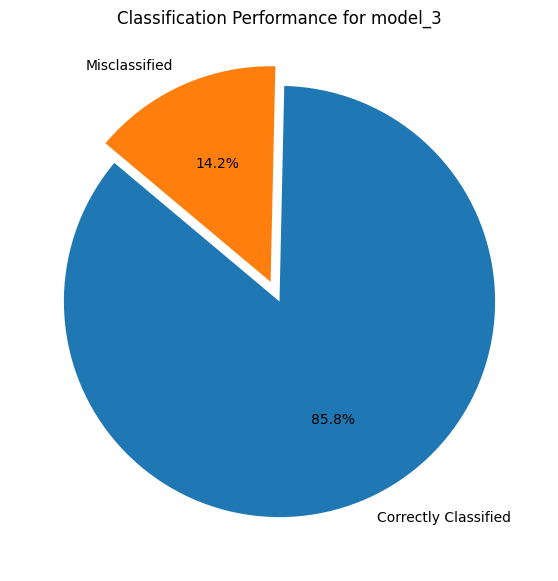

Model: model_3
Total Samples: 10000
Correctly Classified: 8576 (85.76%)
Misclassified: 1424 (14.24%)



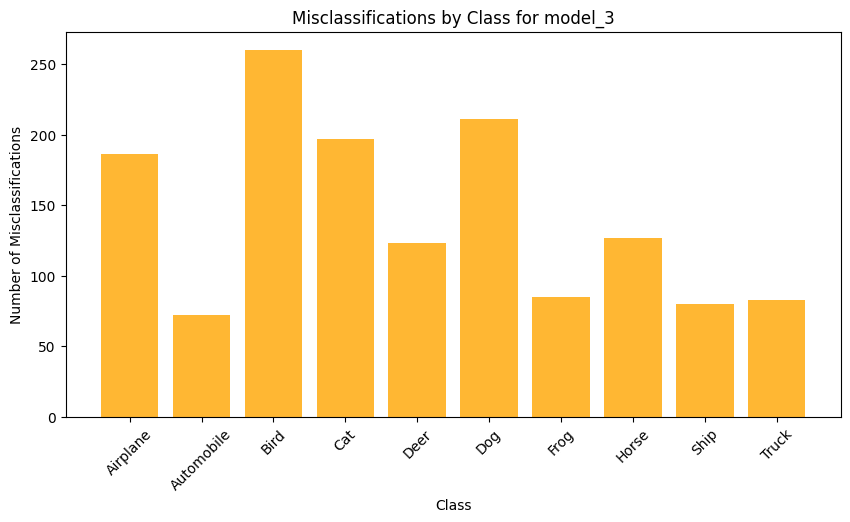

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming X_test, Y_test_en, class_names are defined

def evaluate_model_misclassifications(model, X_test, Y_test_en, class_names, model_name):
    # Get true and predicted labels
    Y_true = np.argmax(Y_test_en, axis=1)
    Y_pred = np.argmax(model.predict(X_test), axis=1)

    # Confusion matrix
    conf_matrix = confusion_matrix(Y_true, Y_pred)

    # Calculate total misclassified labels
    misclassified_counts = np.sum(conf_matrix) - np.trace(conf_matrix)
    total_samples = np.sum(conf_matrix)
    correctly_classified = np.trace(conf_matrix)

    # Visualization for misclassification
    labels = ['Correctly Classified', 'Misclassified']
    sizes = [correctly_classified, misclassified_counts]
    colors = ['#1f77b4', '#ff7f0e']
    explode = (0, 0.1)  # "explode" the misclassified slice

    # Pie Chart Visualization
    plt.figure(figsize=(7, 7))
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title(f"Classification Performance for {model_name}")
    plt.show()

    # Text Output
    print(f"Model: {model_name}")
    print(f"Total Samples: {total_samples}")
    print(f"Correctly Classified: {correctly_classified} ({(correctly_classified / total_samples) * 100:.2f}%)")
    print(f"Misclassified: {misclassified_counts} ({(misclassified_counts / total_samples) * 100:.2f}%)\n")

    # Bar Chart for Misclassifications by Class
    misclassified_by_class = np.sum(conf_matrix, axis=1) - np.diagonal(conf_matrix)

    plt.figure(figsize=(10, 5))
    plt.bar(class_names, misclassified_by_class, color='orange', alpha=0.8)
    plt.title(f'Misclassifications by Class for {model_name}')
    plt.xlabel('Class')
    plt.ylabel('Number of Misclassifications')
    plt.xticks(rotation=45)
    plt.show()

# Class names for CIFAR-10 dataset
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Evaluate Model 1
evaluate_model_misclassifications(model_1, X_test, Y_test_en, class_names, "model_1")

# Evaluate Model 3
evaluate_model_misclassifications(model_3, X_test, Y_test_en, class_names, "model_3")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


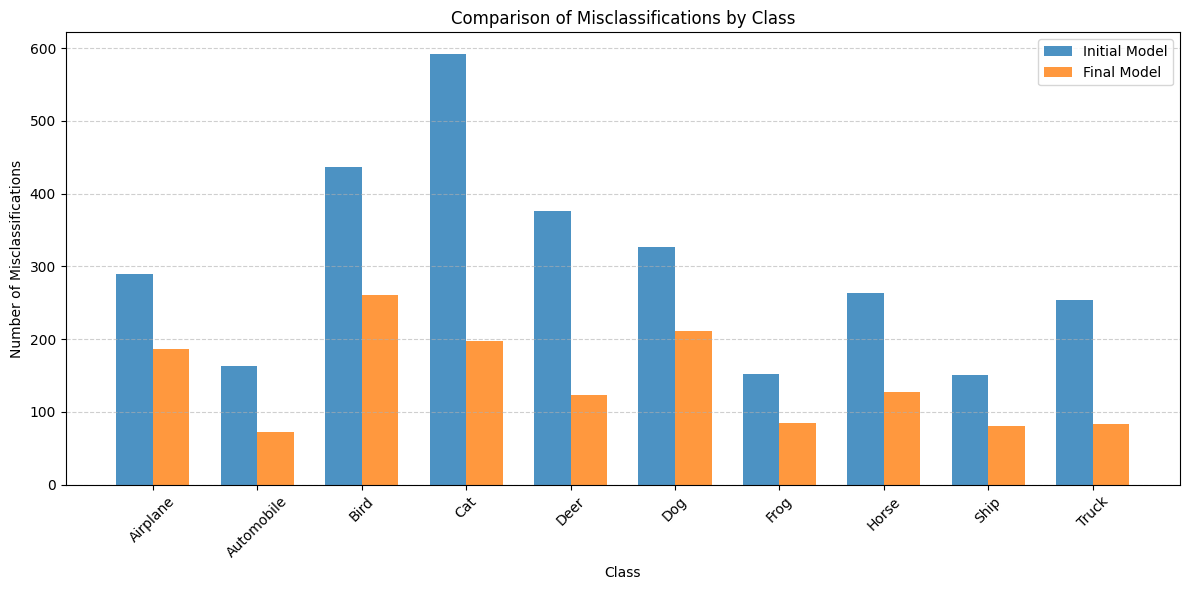

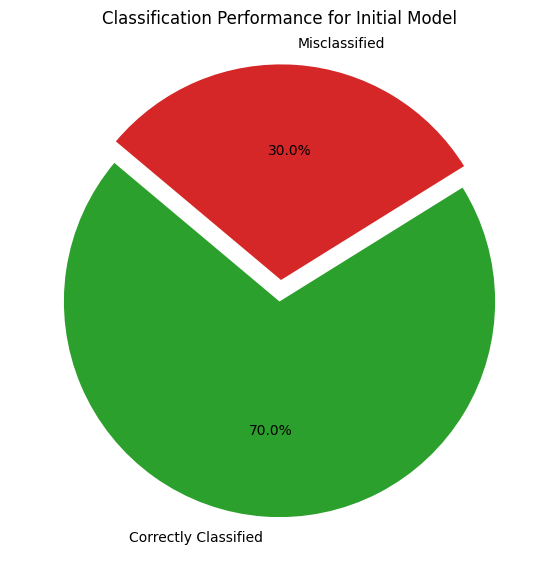

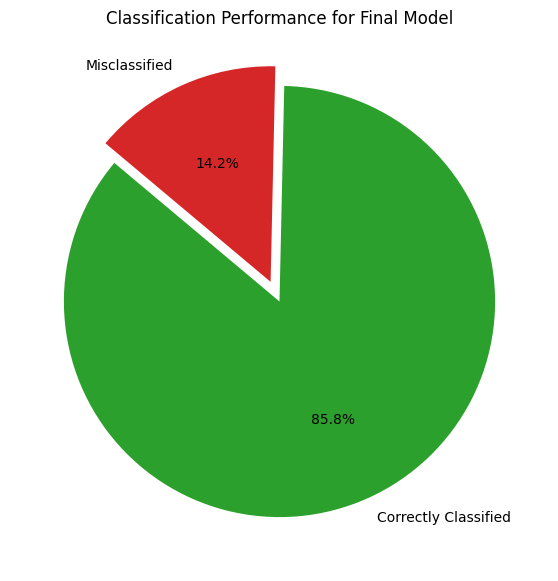

In [ ]:
def evaluate_and_compare_models(model_1, model_3, X_test, Y_test_en, class_names):
    # Get true and predicted labels for both models
    Y_true = np.argmax(Y_test_en, axis=1)
    Y_pred_1 = np.argmax(model_1.predict(X_test), axis=1)
    Y_pred_3 = np.argmax(model_3.predict(X_test), axis=1)

    # Confusion matrices
    conf_matrix_1 = confusion_matrix(Y_true, Y_pred_1)
    conf_matrix_3 = confusion_matrix(Y_true, Y_pred_3)

    # Calculate misclassifications by class
    misclassified_by_class_1 = np.sum(conf_matrix_1, axis=1) - np.diagonal(conf_matrix_1)
    misclassified_by_class_3 = np.sum(conf_matrix_3, axis=1) - np.diagonal(conf_matrix_3)

    # Bar chart: Combine misclassifications
    x = np.arange(len(class_names))  # Class index positions
    width = 0.35  # Bar width

    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, misclassified_by_class_1, width, label='Initial Model', color='#1f77b4', alpha=0.8)
    plt.bar(x + width/2, misclassified_by_class_3, width, label='Final Model', color='#ff7f0e', alpha=0.8)

    plt.title('Comparison of Misclassifications by Class')
    plt.xlabel('Class')
    plt.ylabel('Number of Misclassifications')
    plt.xticks(x, class_names, rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Pie charts for both models
    def plot_pie_chart(conf_matrix, model_name):
        correctly_classified = np.trace(conf_matrix)
        misclassified_counts = np.sum(conf_matrix) - correctly_classified
        sizes = [correctly_classified, misclassified_counts]
        labels = ['Correctly Classified', 'Misclassified']
        colors = ['#2ca02c', '#d62728']
        explode = (0, 0.1)  # Highlight misclassified slice

        plt.figure(figsize=(7, 7))
        plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
        plt.title(f"Classification Performance for {model_name}")
        plt.show()

    # Pie chart for Model 1
    plot_pie_chart(conf_matrix_1, "Initial Model")
    # Pie chart for Model 3
    plot_pie_chart(conf_matrix_3, "Final Model")

# Call the function
evaluate_and_compare_models(model_1, model_3, X_test, Y_test_en, class_names)


--------------------------------------------------------------------------------

# **Car Dataset**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pprint as pprint
import sys
import random
import os
import imageio.v2 as imageio
np.set_printoptions(threshold=sys.maxsize)
from google.colab import drive
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


### Load Dataset
- dataset_path: Paste location of the folder where TrainImages is present
- label_dataset: Label the dataset with '1' for positive cars, '0' for negative cars. (This will be useful for training the model)
- imgs_train_dataset: Store the images in form of numpy arrays with raw pixel values
- imgs_train_normalized: Normalize the image pixel values b/w [0,1] as this helps reduce the size of numbers used for training (instead of using numbers b/w [0,255]

In [ ]:
# replace path r'<insert your path here>'
drive.mount("/content/drive")
dataset_path = '/content/drive/MyDrive/CarData/TrainImages'
imgs_ = []
label_dataset = []
for filename in os.listdir(dataset_path):
    file_path = os.path.join(dataset_path, filename)
    img = imageio.imread(file_path)
    imgs_.append(img)
    if filename.startswith("pos-") and filename.endswith(".pgm"):
        label_dataset.append(1)
    elif filename.startswith("neg-") and filename.endswith(".pgm"):
        label_dataset.append(0)
    img_train_dataset = np.array(imgs_)
training_labels = np.array(label_dataset)
img_train_normalized = img_train_dataset / 255.0

Mounted at /content/drive


In [ ]:
# Normalized image dimensions->it should be (1050, 40, 100) -> 1050 images, 40x100 size:
print(f'Normalized Image dimensions: {img_train_normalized.shape}, Dataset label dimensions: {training_labels.shape}')

Normalized Image dimensions: (1060, 40, 100), Dataset label dimensions: (1060,)


### Inspect Data

Replace index (0 -> 1049) to check different images loaded.

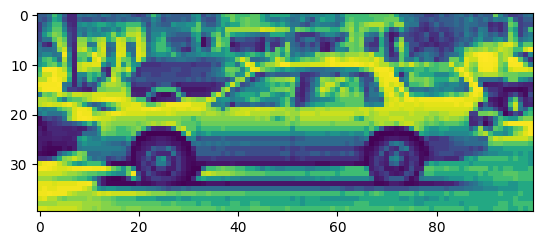



 Label :  1


In [ ]:
plt.imshow(img_train_normalized[560])
plt.show()
print('\n\n Label : ',training_labels[560])

### Pre-processing

Reducing dimensions (no. of input neurons to the network, using PCA dimensionality reduction)
Resources:

- https://youtu.be/LGlvWYuySNw?si=nLC9QqPg64V3rZGk  
- https://youtu.be/kX_asQvIuwk?si=OPi7QqRHuso-uChR

We also flatten the image dataset -> so that we can give it as an input to the MLP neural network.

In [ ]:
# Define PCA for the dataset -> dimensionality reduction -> Q's : How to differentiate b/w different features of a car -> say background vs object, object vs features of objects like 2 wheels vs four wheels.
from sklearn.decomposition import PCA

img_train_flat = img_train_normalized.reshape(img_train_normalized.shape[0], -1)
components = 500 # can change and experiment with the values
pca = PCA(n_components=components)
img_train_pca = pca.fit_transform(img_train_flat)

In [ ]:
# Check the reduced dimensions:
print(f'PCA dimension: {img_train_pca.shape}, Flatten Dimension: {img_train_flat.shape}')

PCA dimension: (1060, 500), Flatten Dimension: (1060, 4000)


### Neural Networks

Define the Neural Networks framewrok:
references:
- Github code: https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py

- Book:  http://neuralnetworksanddeeplearning.com/chap1.html#implementing_our_network_to_classify_digits

### Define the Neural-Networks

### Train Neural-Networks

### Test Neural Netowrks

### Evaluate Results

In [ ]:
#TODO